In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/santander-customer-satisfaction/sample_submission.csv
/kaggle/input/santander-customer-satisfaction/train.csv
/kaggle/input/santander-customer-satisfaction/test.csv


In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
from sklearn import tree
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics.pairwise import cosine_similarity
import plotly.express as px
import scipy.stats as stats
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
santander = pd.read_csv(r"../input/santander-customer-satisfaction/train.csv")
santander = santander.drop("ID", axis=1)
santander_test = pd.read_csv(r"../input/santander-customer-satisfaction/test.csv")
santander_test = santander_test.drop("ID", axis=1)
santander.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [4]:
def dataoveriew(df, message):
    print(f'{message}:\n')
    print("Rows:", df.shape[0])
    print("\nNumber of features:", df.shape[1])
    print("\nFeatures:")
    print(df.columns.tolist())
    print("\nMissing values:", df.isnull().sum().values.sum())
    print("\nUnique values:")
    print(df.nunique())

In [5]:
dataoveriew(santander, 'Overiew of the training dataset')

Overiew of the training dataset:

Rows: 76020

Number of features: 370

Features:
['var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1', 'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1', 'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1', 'imp_op_var40_efect_ult3', 'imp_op_var40_ult1', 'imp_op_var41_comer_ult1', 'imp_op_var41_comer_ult3', 'imp_op_var41_efect_ult1', 'imp_op_var41_efect_ult3', 'imp_op_var41_ult1', 'imp_op_var39_efect_ult1', 'imp_op_var39_efect_ult3', 'imp_op_var39_ult1', 'imp_sal_var16_ult1', 'ind_var1_0', 'ind_var1', 'ind_var2_0', 'ind_var2', 'ind_var5_0', 'ind_var5', 'ind_var6_0', 'ind_var6', 'ind_var8_0', 'ind_var8', 'ind_var12_0', 'ind_var12', 'ind_var13_0', 'ind_var13_corto_0', 'ind_var13_corto', 'ind_var13_largo_0', 'ind_var13_largo', 'ind_var13_medio_0', 'ind_var13_medio', 'ind_var13', 'ind_var14_0', 'ind_var14', 'ind_var17_0', 'ind_var17', 'ind_var18_0', 'ind_var18', 'ind_var19', 'ind_var20_0', 'ind_var20', 'ind_var24_0', 'ind_var24', 'ind_var25

In [6]:
dataoveriew(santander_test, 'Overiew of the test dataset')

Overiew of the test dataset:

Rows: 75818

Number of features: 369

Features:
['var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1', 'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1', 'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1', 'imp_op_var40_efect_ult3', 'imp_op_var40_ult1', 'imp_op_var41_comer_ult1', 'imp_op_var41_comer_ult3', 'imp_op_var41_efect_ult1', 'imp_op_var41_efect_ult3', 'imp_op_var41_ult1', 'imp_op_var39_efect_ult1', 'imp_op_var39_efect_ult3', 'imp_op_var39_ult1', 'imp_sal_var16_ult1', 'ind_var1_0', 'ind_var1', 'ind_var2_0', 'ind_var2', 'ind_var5_0', 'ind_var5', 'ind_var6_0', 'ind_var6', 'ind_var8_0', 'ind_var8', 'ind_var12_0', 'ind_var12', 'ind_var13_0', 'ind_var13_corto_0', 'ind_var13_corto', 'ind_var13_largo_0', 'ind_var13_largo', 'ind_var13_medio_0', 'ind_var13_medio', 'ind_var13', 'ind_var14_0', 'ind_var14', 'ind_var17_0', 'ind_var17', 'ind_var18_0', 'ind_var18', 'ind_var19', 'ind_var20_0', 'ind_var20', 'ind_var24_0', 'ind_var24', 'ind_var25_cte

In [7]:
# In this step let's drop those entries which are similar to each other, to reduce the redundency
santander = santander.drop_duplicates()

In [8]:
santander.shape

(71213, 370)

In [9]:
X = santander.drop(['TARGET'], axis=1)
Y = santander['TARGET']

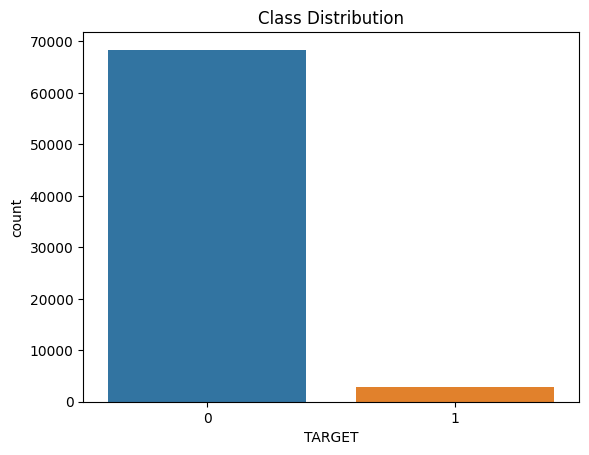

In [10]:
sns.countplot(x='TARGET', data=santander)
plt.title('Class Distribution')
plt.show()

From the histogram of the targeted column, we can observe that the dataset for customer satisfaction is imbalanced. There is a higher volume of dissatisfied customers compared to satisfied ones.

In [11]:
print("\nClass distribution in train data:")
print(santander['TARGET'].value_counts())


Class distribution in train data:
TARGET
0    68398
1     2815
Name: count, dtype: int64


#### Feature Selection 

In [12]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0.01)
sel.fit(X)

VarianceThreshold(threshold=0.01)

Finding quasi-constant features involves identifying features in a dataset that have nearly the same value for 99.99% of the entries. This is done using a Variance Threshold of 0.01. Features with such low variance provide minimal information and can often be removed to simplify the model and improve its performance.

In [13]:
len(X.columns[sel.get_support()])

275

In [14]:
# print the constant features
print(
    len([
        x for x in X.columns
        if x not in X.columns[sel.get_support()]
    ]))

[x for x in X.columns if x not in X.columns[sel.get_support()]]

94


['ind_var1',
 'ind_var2_0',
 'ind_var2',
 'ind_var6_0',
 'ind_var6',
 'ind_var13_medio_0',
 'ind_var13_medio',
 'ind_var14',
 'ind_var17_0',
 'ind_var17',
 'ind_var18_0',
 'ind_var18',
 'ind_var19',
 'ind_var20_0',
 'ind_var20',
 'ind_var27_0',
 'ind_var28_0',
 'ind_var28',
 'ind_var27',
 'ind_var29_0',
 'ind_var29',
 'ind_var30_0',
 'ind_var31_0',
 'ind_var31',
 'ind_var32_cte',
 'ind_var32_0',
 'ind_var32',
 'ind_var33_0',
 'ind_var33',
 'ind_var34_0',
 'ind_var34',
 'ind_var40',
 'ind_var41',
 'ind_var39',
 'ind_var44_0',
 'ind_var44',
 'ind_var46_0',
 'ind_var46',
 'num_var6_0',
 'num_var6',
 'num_var13_medio_0',
 'num_var13_medio',
 'num_var18_0',
 'num_var18',
 'num_var27_0',
 'num_var28_0',
 'num_var28',
 'num_var27',
 'num_var29_0',
 'num_var29',
 'num_var33',
 'num_var34_0',
 'num_var34',
 'num_var41',
 'num_var46_0',
 'num_var46',
 'saldo_var28',
 'saldo_var27',
 'saldo_var41',
 'saldo_var46',
 'imp_amort_var18_hace3',
 'imp_amort_var34_hace3',
 'imp_reemb_var13_hace3',
 'imp

In [15]:
# we can then drop these columns from the train and test sets
X = sel.transform(X)

In [16]:
X.shape, Y.shape

((71213, 275), (71213,))

#### Handling Dataset Imbalance

In [17]:
# Using SMOTE to reduce the imbalance
# Split your dataset into X (features) and Y (target)
X_Train = X  # Exclude the last column for features
Y_Train = Y # The last column is the target variable

# Check the class distribution before balancing
print("Class distribution before balancing:", Counter(Y_Train))

# Create a SMOTE object (Synthetic Minority Over-sampling Technique)
smote = SMOTE(sampling_strategy='minority', random_state=42)

# Fit and apply SMOTE to the training data
X_Train_resampled, Y_Train_resampled = smote.fit_resample(X_Train, Y_Train)

# Check the class distribution after balancing
print("Class distribution after balancing:", Counter(Y_Train_resampled))

Class distribution before balancing: Counter({0: 68398, 1: 2815})
Class distribution after balancing: Counter({0: 68398, 1: 68398})


#### Model Training

In [18]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Train_resampled, Y_Train_resampled, test_size=0.2)
X_Train.shape, X_Test.shape

((109436, 275), (27360, 275))

In [19]:
# Create Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=22,  # Change the maximum depth of the tree
    criterion='entropy',  # Change the splitting criterion to entropy
    max_leaf_nodes=78,  # Limit the maximum number of leaf nodes
    min_samples_leaf=250  # Set the minimum samples per leaf
                            )

# Train the decision tree model
clf.fit(X_Train, Y_Train)

# Check accuracy on the training set
Pred_train = clf.predict(X_Train)
Proba_train = clf.predict_proba(X_Train)
# Model Accuracy
print("TRAIN Accuracy:", accuracy_score(Y_Train, Pred_train))

TRAIN Accuracy: 0.9035143828356299


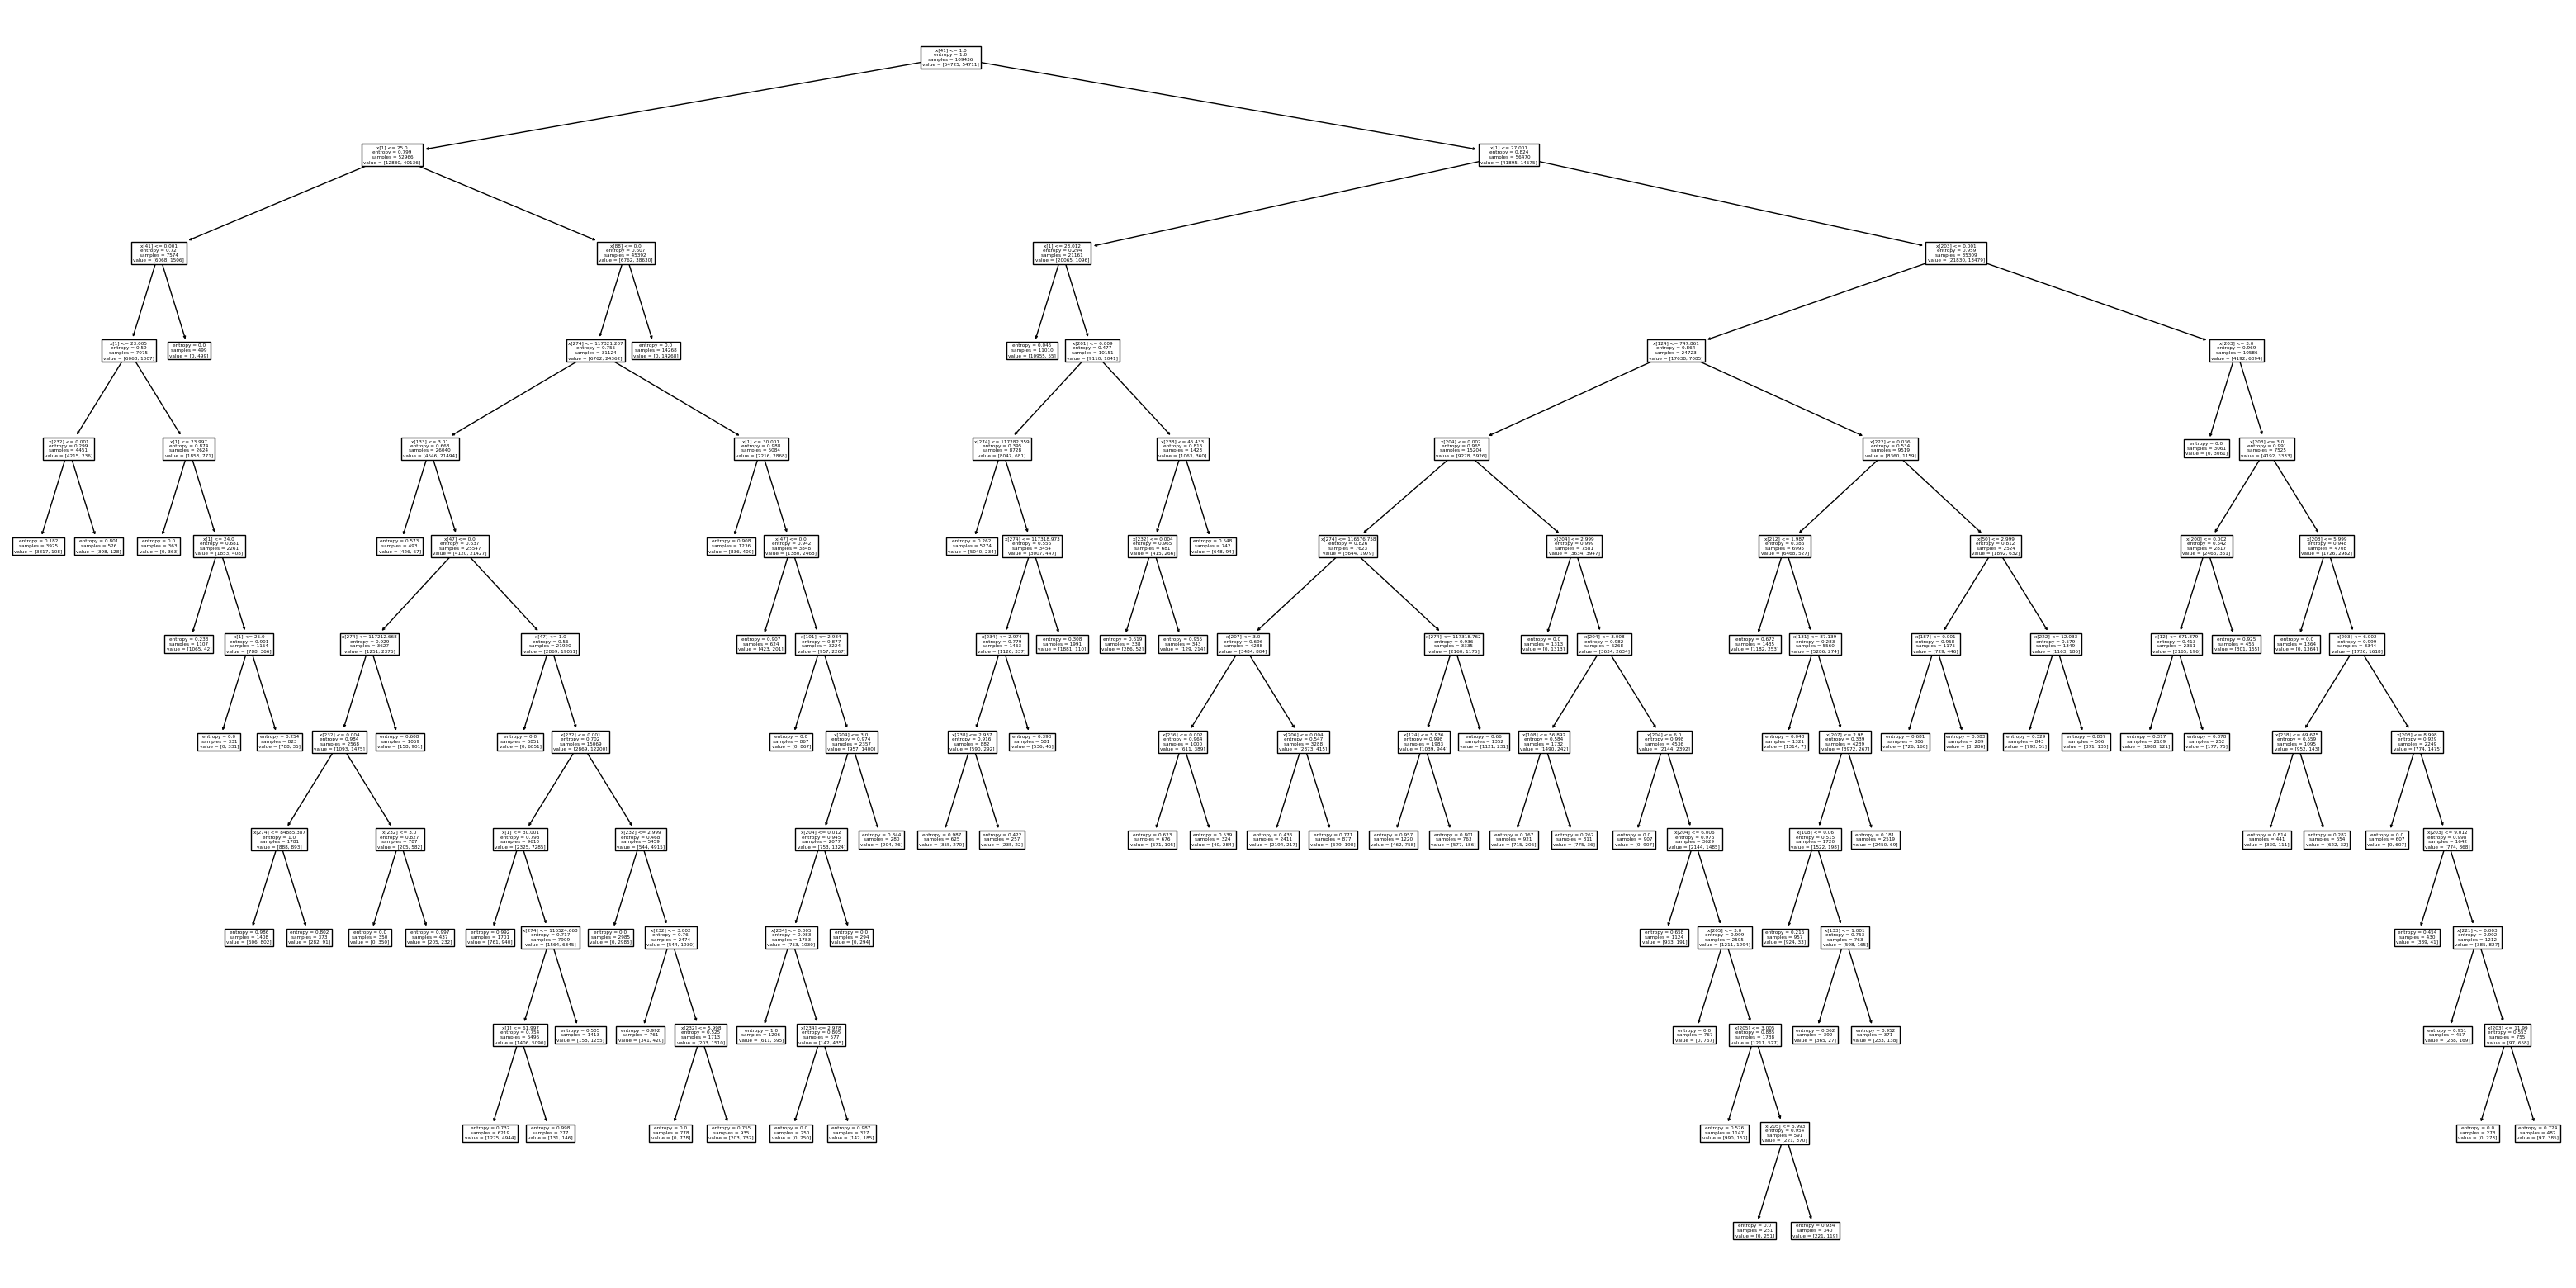

In [20]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(40,20))
_ = tree.plot_tree(clf)

#### Evaluations

In [21]:
Pred_test = clf.predict(X_Test)
Proba_test = clf.predict_proba(X_Test)
# Model Accuracy
print("TEST Accuracy:", accuracy_score(Y_Test, Pred_test))

TEST Accuracy: 0.9036549707602339


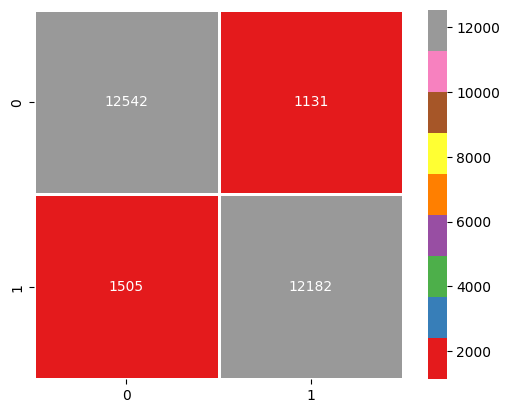

In [22]:
conf_matrix = confusion_matrix(Y_Test, Pred_test)
sns.heatmap(conf_matrix, annot=True, fmt = "d", square = True,
            linewidths = 2, linecolor = "w", cmap = "Set1")
plt.subplots_adjust(wspace = .3, hspace = .3)

([<matplotlib.axis.YTick at 0x7b62bdae6170>,
 [Text(0, 0.0, '0.0'),
  Text(0, 0.3, '0.3'),
  Text(0, 0.6, '0.6'),
  Text(0, 0.8999999999999999, '0.9')])

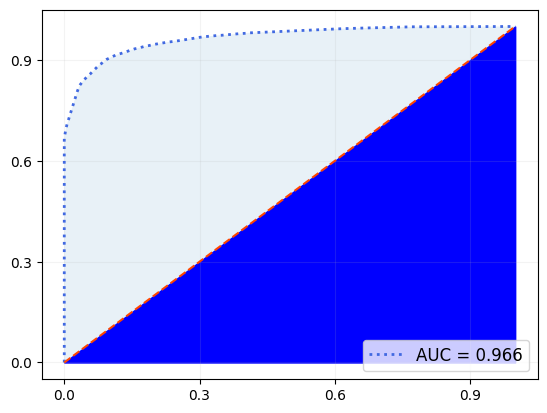

In [23]:
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, thresholds = roc_curve(Y_Test.values, Proba_test[:,1])
plt.plot(fpr, tpr, linestyle = "dotted",
         color = "royalblue", linewidth = 2,
         label = "AUC = " + str(np.around(roc_auc_score(Y_Test.values, Proba_test[:,1]), 3)))
plt.plot([0,1],[0,1], linestyle = "dashed",
         color = "orangered", linewidth = 1.5)
plt.fill_between(fpr, tpr, alpha = .1)
plt.fill_between([0, 1], [0, 1], color = "b")
plt.legend(loc = "lower right",
           prop = {"size" : 12})
plt.grid(True, alpha = .15)
plt.xticks(np.arange(0, 1, .3))
plt.yticks(np.arange(0, 1, .3))

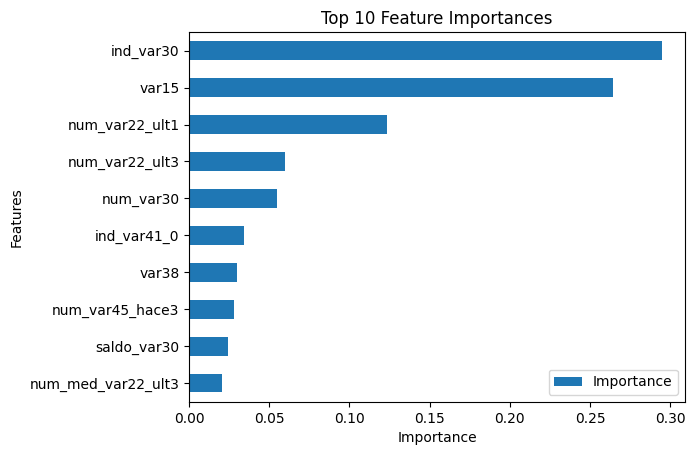

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# Get the feature importances
cols = santander.drop(['TARGET'], axis=1).columns[sel.get_support()]
feat_importances = pd.DataFrame(clf.feature_importances_, index=cols, columns=["Importance"])

# Sort the feature importances
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)

# Select the top 10 features
top_10_feat_importances = feat_importances.head(10)

# Plot the top 10 features
top_10_feat_importances.plot(kind='barh')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 10 Feature Importances')
plt.gca().invert_yaxis()  # To display the highest importance feature at the top
plt.show()